## 1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 2. Load the data set

In [2]:
df = pd.read_csv('4_COVID19_bioactivity_data_3class_pIC50_pubchem_fp_Descriptor_Calculation_Part.cvs')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.060481
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.366532
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.259637
211,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.387216
212,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.494850


## 3. Input features

### 3.1 Input features

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
212,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Output features

In [4]:
 Y = df.pIC50
Y

0      3.060481
1      3.698970
2      3.522879
3      4.823909
4      5.000000
         ...   
209    5.366532
210    5.259637
211    5.387216
212    5.494850
213    5.055517
Name: pIC50, Length: 214, dtype: float64

 ### 3.3 Let's examine the data dimension

In [5]:
X.shape

(214, 881)

In [6]:
Y.shape

(214,)

### 3.4 Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1 - .8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(214, 166)

## 4. Data Split (80/20 ratio)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((171, 166), (171,))

In [11]:
X_test.shape, Y_test.shape

((43, 166), (43,))

## 5. Building a Regression Model using Random Forest

In [12]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.15472430563577455

In [13]:
Y_pred = model.predict(X_test)

## 6. Scatter plot of Experimental vs Predicted pIC50 Values

/home/rashid/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

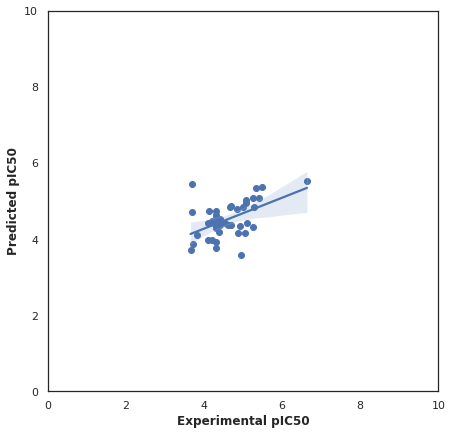

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':1.0})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.figure.set_size_inches(7, 7)
plt.show